In [2]:
folder = '../data/log/'
files = ! ls $folder
print(files)

['0', '00', '01', '0_exploit', '1', '20220105_2052_exploit', '20220105_2054', '20220105_2054_exploit', '20220106_1553', '20220106_1827', '20220106_2131', '20220109163221', '20220109163328', '20220109163509', '20220109164142', '20220109164510', '20220109164747', '20220109164906', '20220109165009', '20220109170308', '20220109170436', '20220109170457', '20220109170513', '20220109180014', '20220109180157', '20220109180717', '20220109180745', '20220109180756', '20220109180830', '20220109180941', '20220109202802', '20220109202929', '20220109203140', '20220109203401', '20220109203424', '20220109203714', '20220109203742', '20220109203755', '20220109203925', '20220109203959', '20220109204352', '20220109211410', '20220109211703', '20220110094405', '20220110094509', '20220110094635', '20220110094706', '20220110095020', '20220110095038', '20220110095604', '20220110095704', '20220110095857', '20220110100010', '20220110100055', '20220110100316', '20220112_0004_exploit', '20220116153438', '2022011615

In [3]:
import json

def load_data(file_name):
    folder = '../data/log/'
    file_dir = folder+files[0]
    file_dir = folder+file_name
    print(file_dir)
    
    data = json.load( open(file_dir+"/process.json"))
    print(data.keys())
    return data

In [4]:
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['savefig.facecolor']='white'

def plot(data, label='reward', smooth_radius=200, savepath=None, labels=None, range=10**8):
    def smooth(y, radius=200, mode='two_sided'):
        if len(y) < 2*radius+1:
            return np.ones_like(y) * y.mean()
        elif mode == 'two_sided':
            convkernel = np.ones(2 * radius+1)
            return np.convolve(y, convkernel, mode='same') / \
                   np.convolve(np.ones_like(y), convkernel, mode='same')
        elif mode == 'causal':
            convkernel = np.ones(radius)
            out = np.convolve(y, convkernel,mode='full') / \
                  np.convolve(np.ones_like(y), convkernel, mode='full')
            return out[:-radius+1]

    colors = ['r', 'b', 'c', 'y']
    
    # for v, c, k in zip(data, colors, labels):
    #     plt.plot(smooth(v[:range], radius=smooth_radius), color=c, label=k)
    #     plt.plot(v[:range], color=c, alpha=0.3)

    for v, k in zip(data, labels):
        plt.plot(smooth(v[:range], radius=smooth_radius), label=k)

    plt.legend()
    plt.grid()
    plt.title(label)
    plt.xlabel('episode')
    plt.ylabel(label)
    if savepath is not None:
        plt.savefig(savepath, bbox_inches='tight',)

def plot_single(data, label=None, smooth_radius=200, color=None, savepath=None, labels=None, range=10**8):
    def smooth(y, radius=200, mode='two_sided'):
        if len(y) < 2*radius+1:
            return np.ones_like(y) * y.mean()
        elif mode == 'two_sided':
            convkernel = np.ones(2 * radius+1)
            return np.convolve(y, convkernel, mode='same') / \
                   np.convolve(np.ones_like(y), convkernel, mode='same')
        elif mode == 'causal':
            convkernel = np.ones(radius)
            out = np.convolve(y, convkernel,mode='full') / \
                  np.convolve(np.ones_like(y), convkernel, mode='full')
            return out[:-radius+1]

    plt.plot(smooth(data[:range], radius=smooth_radius), color=color, label=label)
    plt.plot(data[:range], alpha=0.3, color=color,)

    
img_path = 'generated_img/'

../data/log/20220116153438_exploit/mdp_arbitrary_mdp_fictitious_selfplay2
dict_keys(['episode_reward', 'loss', 'episode_length'])


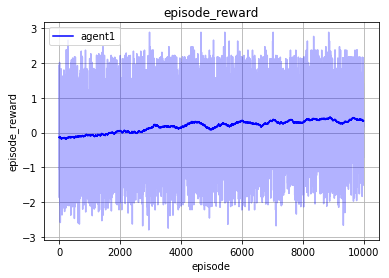

In [23]:
file_name =  '20220116153438_exploit/mdp_arbitrary_mdp_fictitious_selfplay2'
data = load_data(file_name)
# print(data['loss'].keys())
plot(data['episode_reward'], 'episode_reward', smooth_radius=200, savepath='reward.png')
plt.show()

../data/log/20220116153438_exploit5/mdp_arbitrary_mdp_fictitious_selfplay2
dict_keys(['episode_reward', 'loss', 'episode_length'])


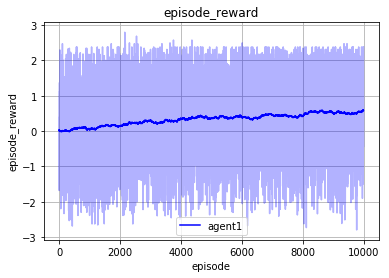

In [24]:
file_name =  '20220116153438_exploit5/mdp_arbitrary_mdp_fictitious_selfplay2'
data = load_data(file_name)
# print(data['loss'].keys())
plot(data['episode_reward'], 'episode_reward', smooth_radius=200, savepath='reward.png')
plt.show()

In [26]:
folder = '../data/model/'
files = ! ls $folder
print(files)

['0', '00', '01', '0_exploit', '1', '20220105_2052', '20220105_2052_exploit', '20220105_2054', '20220105_2054_exploit', '20220109163221', '20220109163328', '20220109163509', '20220109164142', '20220111213921', '20220111214138', '20220111214236', '20220111214306', '20220111214353', '20220111215129', '20220111215808', '20220111220853', '20220111221143', '20220111235734', '20220112_0004', '20220112_0229', '20220116150408', '20220116151437', '20220116152119', '20220116152320', '20220116152338', '20220116152429', '20220116152442', '20220116152455', '20220116153347', '20220116153355', '20220116153438', '20220116153438_exploit', '20220116153438_exploit5', '20220116154202', '20220116154427']


In [72]:
import os, fnmatch
import shutil, errno

def copyanything(src, dst):
    try:
        shutil.copytree(src, dst)
    except OSError as exc: # python >2.5
        if exc.errno in (errno.ENOTDIR, errno.EINVAL):
            shutil.copy(src, dst)
        else: raise

def iters_filter(folder, max_itr):
    """ filter out index larger than max_itr in folder """
    files = ! ls $folder
    for f in files:
        try:
            indx = f.split('_')[0]
            if int(indx) > max_itr:
                for file in os.listdir(folder):
                    if fnmatch.fnmatch(file, '*indx*'):
                        os.remove(file)
        except:
            print(f'{f} is exceptional.')

def subfiles_generate(filename, method):
    olddir = folder+filename

    for i in range(1, 11):
        idx = 10000 * i
        
        newpath = olddir + f'/epi_{idx}/'
        oldpath = olddir + f'/mdp_arbitrary_mdp_{method}/'

        print(oldpath, newpath)

        copyanything(oldpath, newpath)
        # iters_filter(newpath, 20000)

        # replace the meta policy
        os.remove(newpath+'meta_strategies.npy')
        os.remove(newpath+'policy_checkpoints.npy')

        os.rename(newpath+f'{idx}_meta_strategies.npy', newpath+'meta_strategies.npy')
        os.rename(newpath+f'{idx}_policy_checkpoints.npy', newpath+'policy_checkpoints.npy')


# subfiles_generate('20220116200302', method='fictitious_selfplay2')
subfiles_generate('20220116204408', method='nxdo2')

../data/model/20220116204408/mdp_arbitrary_mdp_nxdo2/ ../data/model/20220116204408/epi_10000/
../data/model/20220116204408/mdp_arbitrary_mdp_nxdo2/ ../data/model/20220116204408/epi_20000/
../data/model/20220116204408/mdp_arbitrary_mdp_nxdo2/ ../data/model/20220116204408/epi_30000/
../data/model/20220116204408/mdp_arbitrary_mdp_nxdo2/ ../data/model/20220116204408/epi_40000/
../data/model/20220116204408/mdp_arbitrary_mdp_nxdo2/ ../data/model/20220116204408/epi_50000/
../data/model/20220116204408/mdp_arbitrary_mdp_nxdo2/ ../data/model/20220116204408/epi_60000/
../data/model/20220116204408/mdp_arbitrary_mdp_nxdo2/ ../data/model/20220116204408/epi_70000/
../data/model/20220116204408/mdp_arbitrary_mdp_nxdo2/ ../data/model/20220116204408/epi_80000/
../data/model/20220116204408/mdp_arbitrary_mdp_nxdo2/ ../data/model/20220116204408/epi_90000/
../data/model/20220116204408/mdp_arbitrary_mdp_nxdo2/ ../data/model/20220116204408/epi_100000/


../data/log/20220116165553_exploit_10000/mdp_arbitrary_mdp_fictitious_selfplay2
dict_keys(['episode_reward', 'loss', 'episode_length'])
../data/log/20220116165553_exploit_20000/mdp_arbitrary_mdp_fictitious_selfplay2
dict_keys(['episode_reward', 'loss', 'episode_length'])
../data/log/20220116165553_exploit_30000/mdp_arbitrary_mdp_fictitious_selfplay2
dict_keys(['episode_reward', 'loss', 'episode_length'])


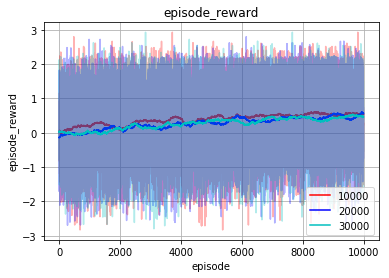

In [65]:
data = []
labels = []
for i in range(1, 4):
    idx =  i*10000
    file_name =  f'20220116165553_exploit_{idx}/mdp_arbitrary_mdp_fictitious_selfplay2'
    data.append(load_data(file_name)['episode_reward']['agent1'])
    labels.append(str(idx))
plot(data, 'episode_reward', smooth_radius=200, savepath='reward.png', labels=labels)
plt.show()

../data/log/20220116222654_exploit5/mdp_arbitrary_mdp_nash_dqn
dict_keys(['episode_reward', 'loss', 'episode_length'])


No handles with labels found to put in legend.


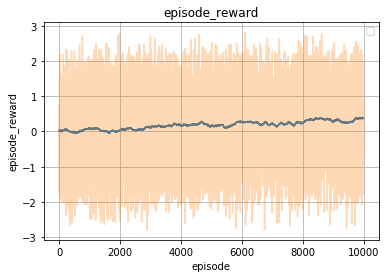

In [71]:
file_name =  '20220116222654_exploit5/mdp_arbitrary_mdp_nash_dqn'  # mwu itr 100
data = load_data(file_name)
# print(data['loss'].keys())
plot_single(data['episode_reward']['agent1'], 'episode_reward', smooth_radius=200, savepath='reward.png')
plt.show()

../data/log/20220116222654_exploit5/mdp_arbitrary_mdp_nash_dqn
dict_keys(['episode_reward', 'loss', 'episode_length'])
../data/log/20220116234427_exploit/mdp_arbitrary_mdp_nash_dqn
dict_keys(['episode_reward', 'loss', 'episode_length'])
../data/log/20220117101415_exploit/mdp_arbitrary_mdp_nash_dqn
dict_keys(['episode_reward', 'loss', 'episode_length'])


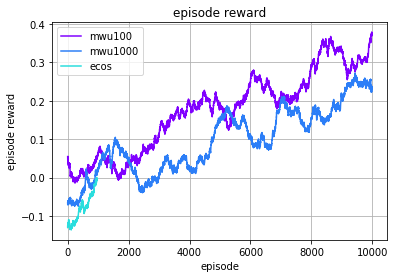

In [100]:
import matplotlib.cm as cm
colors = cm.rainbow(np.linspace(0, 1, 7))

file_name1 =  '20220116222654_exploit5/mdp_arbitrary_mdp_nash_dqn'  # mwu itr 100
file_name2 =  '20220116234427_exploit/mdp_arbitrary_mdp_nash_dqn'   # mwu itr 1000
file_name3 =  '20220117101415_exploit/mdp_arbitrary_mdp_nash_dqn'   # ecos

labels=['mwu100', 'mwu1000', 'ecos']

fnames = [file_name1, file_name2, file_name3]
for file_name, c, l in zip (fnames, colors, labels):
    data = load_data(file_name)
    # print(data['loss'].keys())
    plot_single(data['episode_reward']['agent1'], l, color=c, smooth_radius=400, savepath='reward.png')

label='episode reward'
plt.legend()
plt.grid()
plt.title(label)
plt.xlabel('episode')
plt.ylabel(label)
# if savepath is not None:
#     plt.savefig(savepath, bbox_inches='tight',)
plt.show()

No handles with labels found to put in legend.


../data/log/20220117101415_exploit/mdp_arbitrary_mdp_nash_dqn
dict_keys(['episode_reward', 'loss', 'episode_length'])


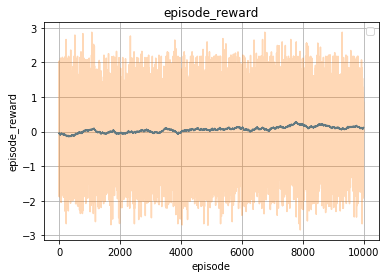

In [88]:
file_name =  '20220117101415_exploit/mdp_arbitrary_mdp_nash_dqn'
data = load_data(file_name)
# print(data['loss'].keys())
plot_single(data['episode_reward']['agent1'], 'episode_reward', smooth_radius=200, savepath='reward.png')
plt.show()

../data/log/20220116200302_exploit_10000/mdp_arbitrary_mdp_fictitious_selfplay2
dict_keys(['episode_reward', 'loss', 'episode_length'])
../data/log/20220116200302_exploit_20000/mdp_arbitrary_mdp_fictitious_selfplay2
dict_keys(['episode_reward', 'loss', 'episode_length'])
../data/log/20220116200302_exploit_30000/mdp_arbitrary_mdp_fictitious_selfplay2
dict_keys(['episode_reward', 'loss', 'episode_length'])
../data/log/20220116200302_exploit_40000/mdp_arbitrary_mdp_fictitious_selfplay2
dict_keys(['episode_reward', 'loss', 'episode_length'])
../data/log/20220116200302_exploit_50000/mdp_arbitrary_mdp_fictitious_selfplay2
dict_keys(['episode_reward', 'loss', 'episode_length'])
../data/log/20220116200302_exploit_60000/mdp_arbitrary_mdp_fictitious_selfplay2
dict_keys(['episode_reward', 'loss', 'episode_length'])
../data/log/20220116200302_exploit_70000/mdp_arbitrary_mdp_fictitious_selfplay2
dict_keys(['episode_reward', 'loss', 'episode_length'])
../data/log/20220116200302_exploit_80000/mdp_arb

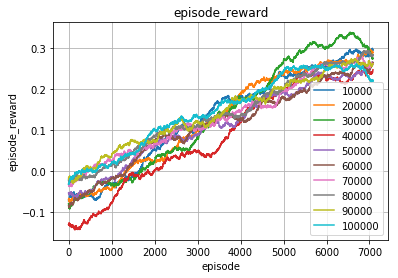

In [84]:
data = []
labels = []
for i in range(1, 11):
    idx =  i*10000
    file_name =  f'20220116200302_exploit_{idx}/mdp_arbitrary_mdp_fictitious_selfplay2'
    data.append(load_data(file_name)['episode_reward']['agent1'])
    labels.append(str(idx))
plot(data, 'episode_reward', smooth_radius=1000, savepath='reward.png', labels=labels)
plt.show()

../data/log/20220118120400_exploit_10000/mdp_arbitrary_mdp_nash_dqn
dict_keys(['episode_reward', 'loss', 'episode_length'])
../data/log/20220118120400_exploit_20000/mdp_arbitrary_mdp_nash_dqn
dict_keys(['episode_reward', 'loss', 'episode_length'])
../data/log/20220118120400_exploit_30000/mdp_arbitrary_mdp_nash_dqn
dict_keys(['episode_reward', 'loss', 'episode_length'])
../data/log/20220118120400_exploit_40000/mdp_arbitrary_mdp_nash_dqn
dict_keys(['episode_reward', 'loss', 'episode_length'])
../data/log/20220118120400_exploit_50000/mdp_arbitrary_mdp_nash_dqn
dict_keys(['episode_reward', 'loss', 'episode_length'])


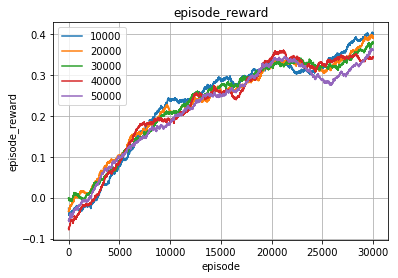

(5, 29991)
reward mean:  [0.44358557 0.39449274 0.38996475 0.31085253 0.32980772]
reward std:  [0.99879887 0.96683726 1.02608927 1.02300163 1.00420606]


<ErrorbarContainer object of 3 artists>

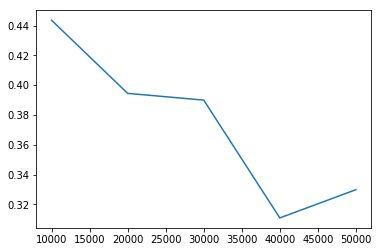

In [19]:
# Nash-DQN MWU itr=100

data = []
labels = []
num_tests = 5

for i in range(1, num_tests+1):
    idx =  i*10000
    file_name =  f'20220118120400_exploit_{idx}/mdp_arbitrary_mdp_nash_dqn'
    data.append(load_data(file_name)['episode_reward']['agent1'])
    labels.append(str(idx))
plot(data, 'episode_reward', smooth_radius=2000, savepath='reward.png', labels=labels)
plt.show()
print(np.array(data).shape)
last_1000_epi_rewards = np.array(data)[:, -1000:]
mean = np.mean(last_1000_epi_rewards, axis=-1)
std = np.std(last_1000_epi_rewards, axis=-1)

print("reward mean: ", mean)
print("reward std: ", std)
# plt.errorbar(np.arange(1, num_tests+1)*10000, mean, std, fmt='--o', elinewidth=1, capsize=3)
plt.errorbar(np.arange(1, num_tests+1)*10000, mean)